# SVM

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

# 데이터 분할(train, test 데이터 7:3으로 - sklearn의 train_set_split)
from sklearn.model_selection import train_test_split
import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale
from sklearn.svm import SVC

#회귀분석 패키지
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [25]:
b_cancer = pd.read_csv("/home/pirl/Downloads/유방암.csv",engine = 'python',
                        encoding='CP949')
#sns.countplot(b_cancer["diagnosis"],label="Count")
#b_cancer.describe()
# print(b_cancer.isnull().sum(axis=0))
#b_cancer.head()

## Data Split

In [85]:
b_cancer_y = b_cancer['diagnosis']
b_cancer_x = b_cancer.drop('diagnosis',axis=1, inplace=False)

# train/test 데이터의 목표변수/설명변수 지정
b_train_x, b_test_x, b_train_y, b_test_y = \
train_test_split(b_cancer_x, b_cancer_y, test_size=0.3, random_state=1234)

# train데이터와 test데이터 크기
print("train data X size: {}".format(b_train_x.shape))
print("train data Y size: {}".format(b_train_y.shape))
print("test data X size: {}".format(b_test_x.shape))
print("test data Y size: {}".format(b_test_y.shape))

train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


## SVM Modeling

In [86]:
svm_un=SVC(random_state=1234)
svm_un.fit(b_train_x,b_train_y)

print("Accuracy on training set:{:.3f}".format(svm_un.score(b_train_x,b_train_y)))
print("Accuracy on training set:{:.3f}".format(svm_un.score(b_test_x,b_test_y)))
print()
print(svm_un)

Accuracy on training set:1.000
Accuracy on training set:0.614

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)


#### 설명변수에 스케일없이 바로 SVM모델링하였고, 정확도는 61%정도로 상당히 낮은 결과를 보여주었다. 

In [87]:
#C를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_C=[]

for C in range(10):
    svm1 = SVC(C=(C+1)/10,random_state=1234)
    svm1.fit(b_train_x, b_train_y)
    para_C.append((C+1)/10)
    train_ac.append(svm1.score(b_train_x,b_train_y))
    test_ac.append(svm1.score(b_test_x,b_test_y))
    
ds_acc1 =  pd.DataFrame()
ds_acc1['C'] = para_C
ds_acc1["TrainAccuraccy"] =train_ac
ds_acc1["TestAccuracy"] = test_ac

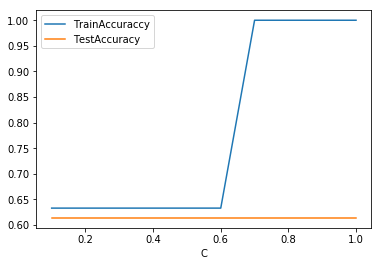

In [88]:
ds_acc1.round(3)
ds_acc1.set_index("C",inplace=False).plot.line()

#### scaling 되지 않은 데이터에서 test set은 Cost의 의해 정확도가 변화하지 않았다.

In [89]:
#Gamma를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_g=[]

for gamma in range(1,10):
    svm2 = SVC(gamma=gamma/10,random_state=1234)
    svm2.fit(b_train_x, b_train_y)
    para_g.append(gamma/10)
    train_ac.append(svm2.score(b_train_x,b_train_y))
    test_ac.append(svm2.score(b_test_x,b_test_y))
    
ds_acc2 =  pd.DataFrame()
ds_acc2['Gamma'] = para_g
ds_acc2["TrainAccuraccy"] =train_ac
ds_acc2["TestAccuracy"] = test_ac

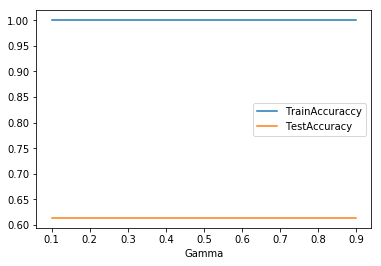

In [90]:
ds_acc2.round(3)
ds_acc2.set_index("Gamma",inplace=False).plot.line()

#### Gamma도 마찬가지로 변화가 없었다. SVM사용전 scaling를 진행하겠다.
# Scaling 

In [91]:
b_train_x_scaled = scale(b_train_x,axis=0)

b_test_x_scaled = scale(b_test_x,axis=0)

pd.DataFrame(b_train_x_scaled, columns =b_train_x.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,0.392510,1.532466,0.129559,-0.268374,3.006528,-0.319818,-1.181086,-1.960433,-0.212723,1.374639,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,-0.772940,0.591089,-0.748212,-0.615863,-0.566229,-0.868126,-0.741549,-0.970248,-0.875810,-0.937946,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,3.183785,0.406047,2.679366,1.402730,1.012718,0.534849,1.304586,2.762841,3.967008,-0.378589,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,-0.023799,0.163517,-0.156882,0.087579,-0.451465,-0.805296,-0.710180,-0.666886,-0.787230,-0.974842,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,-0.822023,-0.352084,-0.768117,-0.646975,1.910275,-0.104175,-0.500805,0.206439,0.236507,2.092966,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


In [92]:
svm_un_scaled = SVC(random_state=1234)
svm_un_scaled.fit(b_train_x_scaled,b_train_y)
print("Accuracy on training set:{:.3f}".format(svm_un_scaled.score(b_train_x_scaled,b_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_un_scaled.score(b_test_x_scaled,b_test_y)))

Accuracy on training set:0.995
Accuracy on test set: 0.953


#### scaling이후 정확도가 급격하게 좋아 졌는데, 원래 데이터의 변수들 끼리의 단위가 많이 틀렸던것을 확인할수 있다. Cost값과 Gamma값을 확인해 보겠다.

In [93]:
#c를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_C=[]

for C in range(50):
    svm1_scaled = SVC(C=C+1,random_state=1234)
    svm1_scaled.fit(b_train_x_scaled, b_train_y)
    para_C.append(C+1)
    train_ac.append(svm1_scaled.score(b_train_x_scaled,b_train_y))
    test_ac.append(svm1_scaled.score(b_test_x_scaled,b_test_y))
    
ds_acc3_scaled =  pd.DataFrame()
ds_acc3_scaled['C'] = para_C
ds_acc3_scaled["TrainAccuraccy"] =train_ac
ds_acc3_scaled["TestAccuracy"] = test_ac

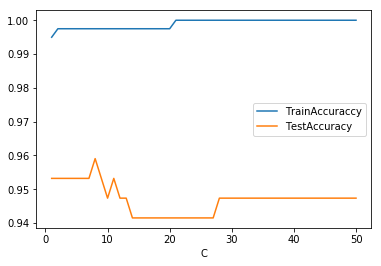

In [94]:
ds_acc3_scaled.round(3)
ds_acc3_scaled.set_index("C",inplace=False).plot.line()

#### Cost값이 5~9일때가 가장 높은 정확도를 보인다. cost는 모델의 flexibilty을 좀더 더하기 위해 높은 정확도중 가장낮은 cost값인 8를 사용하겠다.

In [99]:
#Gamma를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_g=[]

for gamma in range(1,10):
    svm2_scaled = SVC(gamma=gamma/10,random_state=1234)
    svm2_scaled.fit(b_train_x_scaled, b_train_y)
    para_g.append(gamma/10)
    train_ac.append(svm2_scaled.score(b_train_x_scaled,b_train_y))
    test_ac.append(svm2_scaled.score(b_test_x_scaled,b_test_y))
    
ds_acc2_scaled =  pd.DataFrame()
ds_acc2_scaled['Gamma'] = para_g
ds_acc2_scaled["TrainAccuraccy"] =train_ac
ds_acc2_scaled["TestAccuracy"] = test_ac

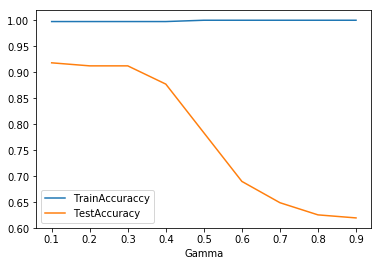

In [100]:
ds_acc2_scaled.round(3)
ds_acc2_scaled.set_index("Gamma",inplace=False).plot.line()

#### Gamma는 정확도가 높으면서 낮은 0.1을사용하여 데이터의 영향력 거리가 커지게 만들겠다.

In [103]:
svm_un=SVC(random_state=11e-3, 1e-7, 1e-9234,C=10,gamma=0.1,probability=True)
svm_un.fit(b_train_x_scaled,b_train_y)

print("Accuracy on training set:{:.3f}".format(svm_un.score(b_train_x_scaled,b_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_un.score(b_test_x_scaled,b_test_y)))
print()
print(svm_un)

Accuracy on training set:1.000
Accuracy on test set:0.912

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=1234, shrinking=True,
  tol=0.001, verbose=False)


## GridSearch

In [105]:
svc=SVC(random_state=1234)
param_grid = {'kernel': ['rbf','linear'], 
              'gamma': [1e-3, 1e-7, 1e-9],
              'C': [1,10,100,1000]}
scores = ['accuracy', 'recall']
for sc in scores:
    clf=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    clf.fit(b_train_x,b_train_y)
    print(clf.best_params_)
    print("best_score : ", np.round(clf.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
best_score :  0.96
# Tuning hyper-parameters for recall
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
best_score :  0.932


#### GridSearch결과 cost = 1000을 사용하며 gamma=0.001 또한 kernel은 linear를 사용한다. ROC커브로 두 모델을 평가해 보겠다.

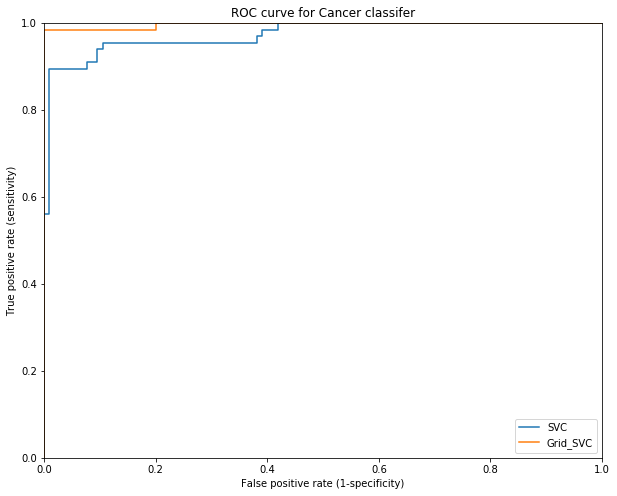

In [110]:
svc=SVC(C=6,gamma=0.01,kernel='rbf',probability=True)
Grid_svc=SVC(C=10,gamma=0.001,kernel='linear',probability=True)

Grid_svc.fit(b_test_x_scaled,b_test_y)
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_svc_p =svm_un.predict_proba(b_test_x_scaled)[:,1]
y_pred_svc_grid =Grid_svc.predict_proba(b_test_x_scaled)[:,1]

models=[y_pred_svc_p,y_pred_svc_grid]
label=['SVC','Grid_SVC']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(2)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(b_test_y,models[m])
    #print('model:',label[m])
    #print('thresholds:',np.round(thresholds,2))
    #print('tpr:       ',np.round(tpr,2))
    #print('fpr:       ',np.round(fpr,2))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)


## 처음 SVM모델과 GridSearch 둘다 좋은 모델로 판단되지만, GridSearch모델이 조금더 정확하게 분류한다고 판단된다. 만약 불량과 양품을 찾는 모델에서 양품량의 정확도를 높힐때, 불량률도 높아지는 모델로 볼수 있다. Cost: 10, gamma: 0.001, kernel: 'linear'를 사용하는 SVM모델이 가장 적합하다고 판단된다.